In [142]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import linear_kernel


In [143]:
df = pd.read_csv('final_data.csv')

In [144]:
df.head()

,category,headline,links,abstract,keywords,text,sentiment_score,sentiment_label
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons,143 mile 35 day lesson learn rest training i'v...,0.2732,neutral
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,talk crazi crazi helpful think talk tool coach...,0.9022,positive
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,crenezumab trial gaug alzheimer drug prevent s...,0.0258,neutral
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life,oh differ want busy tri perfect want happy foc...,0.8402,positive
4,WELLNESS,Bad Love Advice: 9 Lessons To Unlearn,https://www.huffingtonpost.com/entry/bad-love-...,"By Carey Moss for YouBeauty.com Love rom-coms,...",bad-love-advice-from-movies,bad love advice 9 lesson unlearn carey moss yo...,0.8779,positive


In [145]:
df.isnull().sum()

category              0
headline              0
links                 0
abstract              0
keywords           2331
text                  0
sentiment_score       0
sentiment_label       0
dtype: int64

In [146]:
df.dropna(subset=['keywords'], inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42098 entries, 0 to 44428
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         42098 non-null  object 
 1   headline         42098 non-null  object 
 2   links            42098 non-null  object 
 3   abstract         42098 non-null  object 
 4   keywords         42098 non-null  object 
 5   text             42098 non-null  object 
 6   sentiment_score  42098 non-null  float64
 7   sentiment_label  42098 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.9+ MB


Data Visualization

In [148]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])

In [149]:
CLASS_NAMES = sorted(list(df.category.unique()))
CLASS_NAMES

['BUSINESS',
 'ENTERTAINMENT',
 'FOOD & DRINK',
 'PARENTING',
 'POLITICS',
 'SPORTS',
 'STYLE & BEAUTY',
 'TRAVEL',
 'WELLNESS',
 'WORLD NEWS']

In [150]:
df[['category','label']].value_counts()

category        label
ENTERTAINMENT   1        4813
WORLD NEWS      9        4796
TRAVEL          7        4737
STYLE & BEAUTY  6        4645
POLITICS        4        4608
FOOD & DRINK    2        4606
WELLNESS        8        4454
PARENTING       3        4199
BUSINESS        0        2729
SPORTS          5        2511
Name: count, dtype: int64

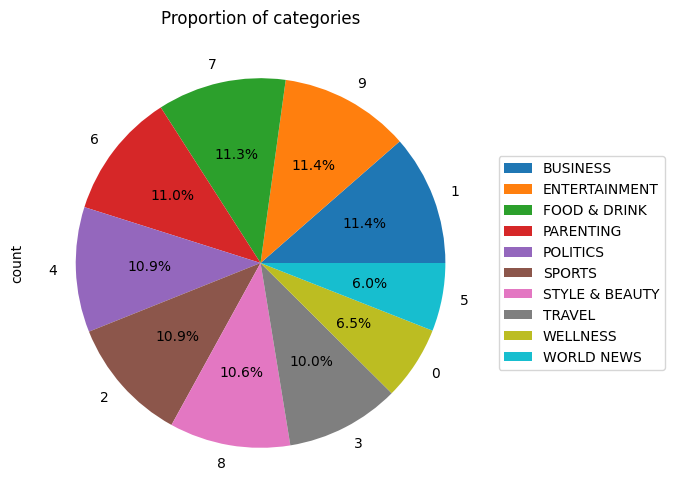

In [151]:
# Set color palette to Blues
sns.set_palette("tab10")

# Plot pie chart
df['label'].value_counts().plot.pie(figsize=(6, 6), title="Proportion of categories", autopct='%1.1f%%')
labels = sorted(list(df.category.unique()))
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().set_aspect('equal')

# Show the plot
plt.show()

C:\Users\Ishaan Sharma\AppData\Local\Temp\ipykernel_22040\2551336226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette=custom_palette)


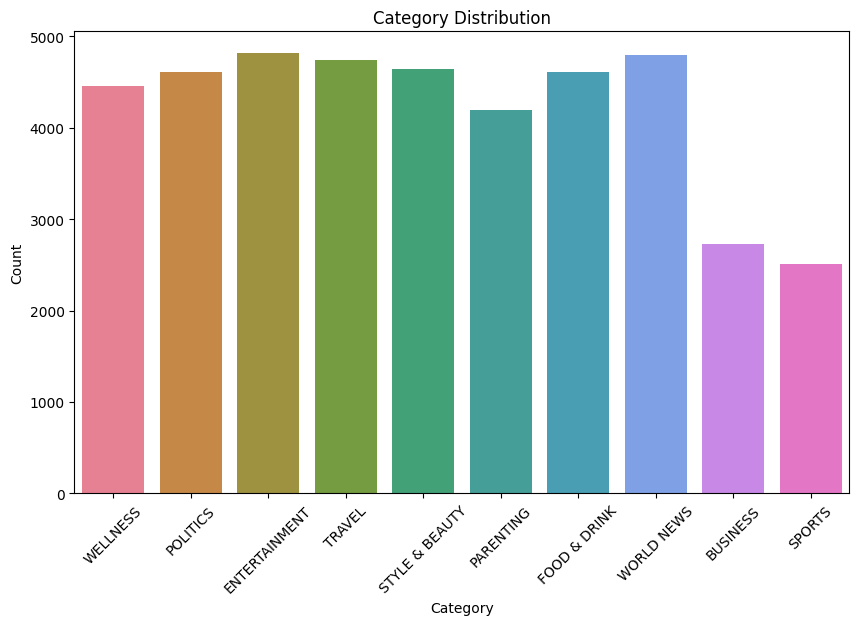

In [152]:
custom_palette = sns.color_palette("husl", len(df['category'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, palette=custom_palette)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Ishaan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


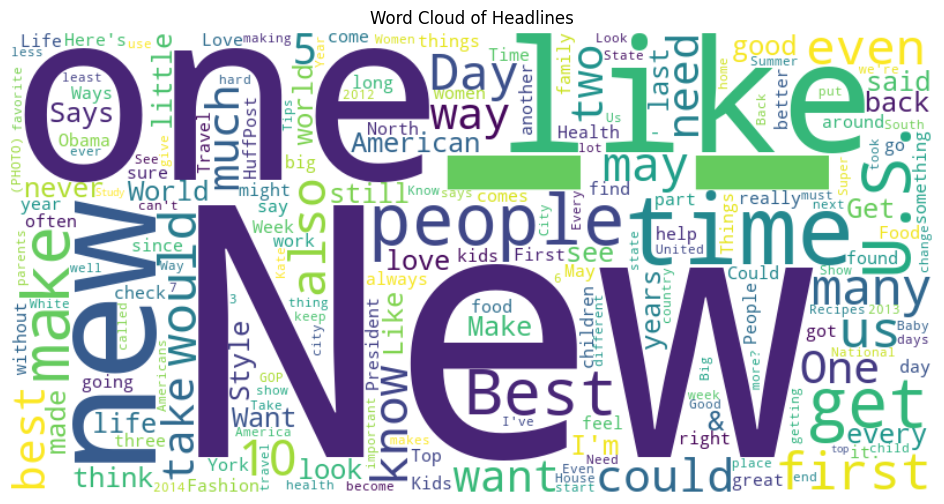

In [153]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Combine headlines and short descriptions
text = ' '.join(df['headline']) + ' ' + ' '.join(df['abstract'])

# Define additional phrases to ignore
ignore_phrases = ["(PHOTOS)", "(VIDEO)"]

# Tokenize text and remove stopwords and ignore phrases
words = [word for word in text.split() if word.lower() not in stop_words and word not in ignore_phrases]

# Count the frequency of each word
word_counts = Counter(words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Headlines')
plt.axis('off')
plt.show()


C:\Users\Ishaan Sharma\AppData\Local\Temp\ipykernel_22040\2125543917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sentiment_label'], y=df['sentiment_score'], palette='Blues')


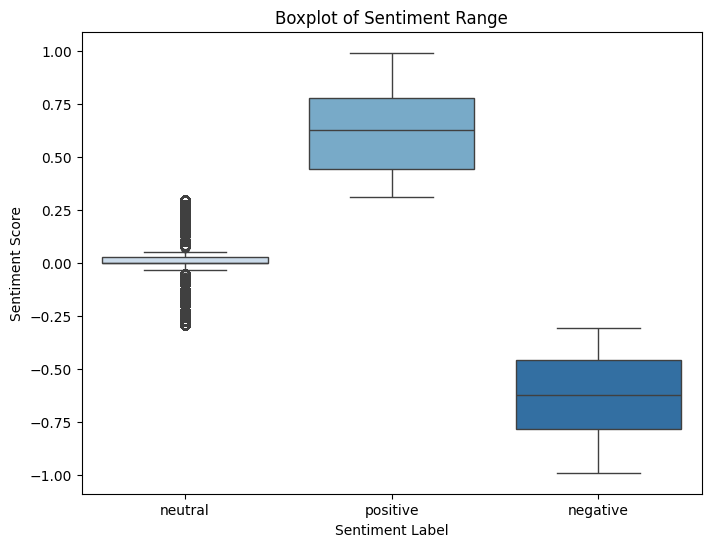

In [154]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sentiment_label'], y=df['sentiment_score'], palette='Blues')

# Customize labels and title
plt.title('Boxplot of Sentiment Range')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')

# Show plot
plt.show()

C:\Users\Ishaan Sharma\AppData\Local\Temp\ipykernel_22040\814421452.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='sentiment_score', data=df, palette=custom_palette, whis=[10, 90], width=0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


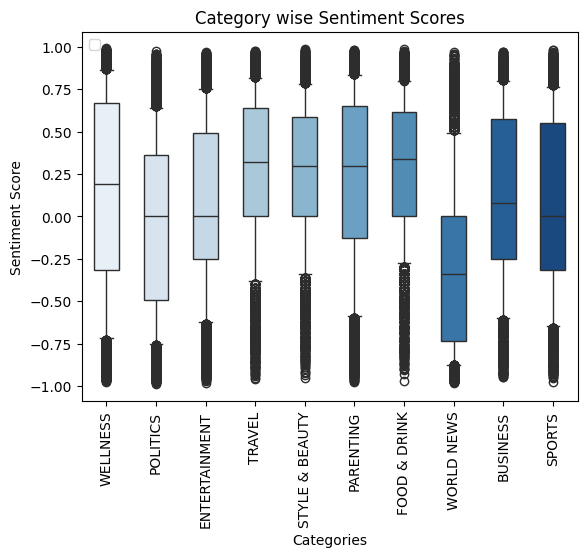

In [155]:
category_scores = df.groupby('category')['sentiment_score'].mean().reset_index()

# Define custom color palette
custom_palette = sns.color_palette("Blues", len(category_scores))

# Create a boxplot using seaborn with custom color palette
sns.boxplot(x='category', y='sentiment_score', data=df, palette=custom_palette, whis=[10, 90], width=0.5)

# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Sentiment Score')
plt.title('Category wise Sentiment Scores')
plt.legend(loc='upper left')
# Rotate xlabel
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [156]:
avg_sentiment_score = df.groupby('category')['sentiment_score'].mean()
print(avg_sentiment_score)

category
BUSINESS          0.127192
ENTERTAINMENT     0.095945
FOOD & DRINK      0.276075
PARENTING         0.199099
POLITICS         -0.064580
SPORTS            0.083387
STYLE & BEAUTY    0.242249
TRAVEL            0.258460
WELLNESS          0.149347
WORLD NEWS       -0.270747
Name: sentiment_score, dtype: float64


[nltk_data] Downloading package stopwords to C:\Users\Ishaan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Ishaan Sharma\AppData\Local\Temp\ipykernel_22040\918614254.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')


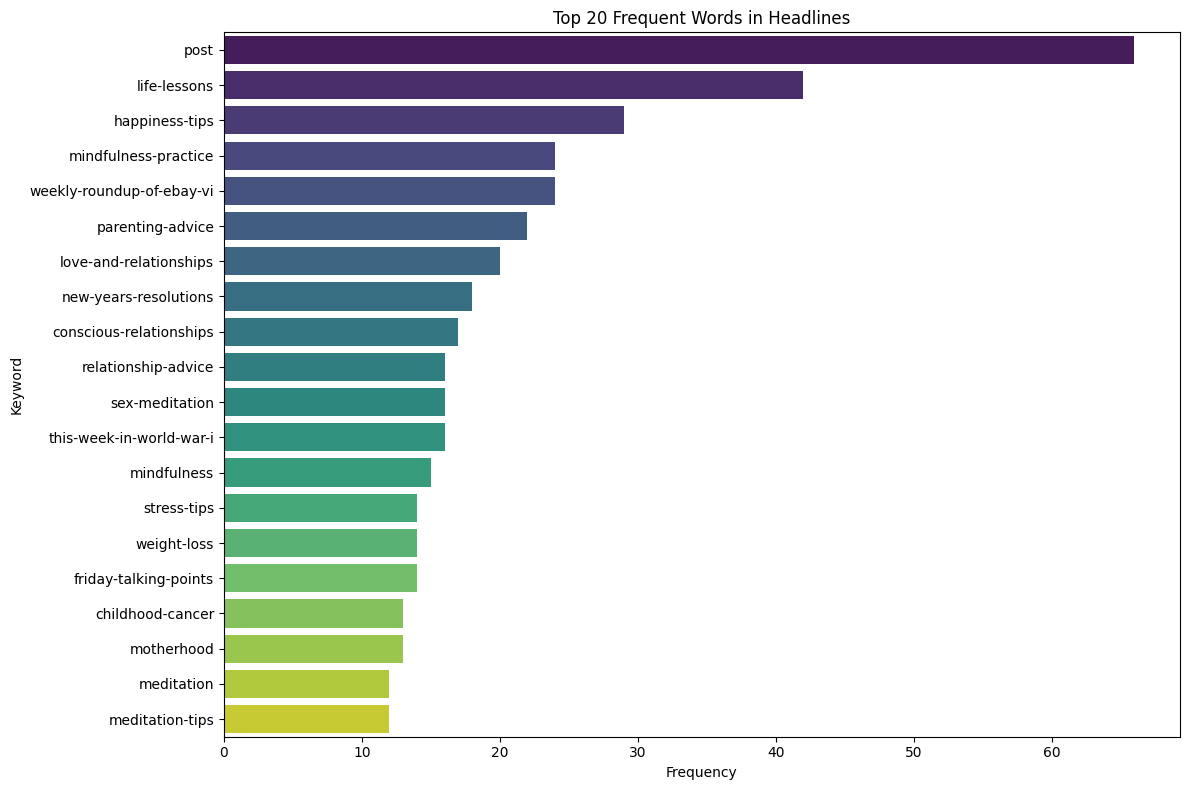

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize the headlines into words and split words with "-"
words = [word.strip('-') for headline in df['keywords'] for word in headline.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Select the top 50 most frequent words
top_words = dict(word_counts.most_common(20))

# Create a DataFrame from the top words
top_words_df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])

# Plot a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
plt.title('Top 20 Frequent Words in Headlines')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
